In [86]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [87]:
PM = pd.read_csv("DATA_SET.csv")

In [88]:
PM

,Bore_Radius_mm,Bore_Hight_mm,Rim_Hight_mm,Bore_Width_mm,Web_Thick_mm,Max_Disp_m,Max_Von_Mises_Pa
0,30,5.0,5.0,14,6,0.000992,722795584.0
1,35,5.0,5.0,14,6,0.000952,746133440.0
2,40,5.0,5.0,14,6,0.000909,763889024.0
3,35,7.5,5.0,14,6,0.000917,707635840.0
4,30,7.5,5.0,14,6,0.000959,684517376.0
...,...,...,...,...,...,...,...
238,35,7.5,10.0,18,8,0.000596,660376320.0
239,40,7.5,10.0,18,8,0.000575,678176576.0
240,30,10.0,10.0,18,8,0.000596,618010368.0
241,35,10.0,10.0,18,8,0.000574,638988672.0


In [89]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [90]:
x = PM[['Bore_Radius_mm','Bore_Hight_mm','Rim_Hight_mm','Bore_Width_mm','Web_Thick_mm']]
y = PM[['Max_Disp_m','Max_Von_Mises_Pa']]

In [91]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.2)

In [92]:
scaler1 = preprocessing.StandardScaler().fit(x1_train)
scaler1_y = preprocessing.StandardScaler().fit(y1_train)
scalert1 = preprocessing.StandardScaler().fit(x1_test)
scalert1_y = preprocessing.StandardScaler().fit(y1_test)

In [93]:
X1_scaled = scaler1.transform(x1_train)
Y1_scaled = scaler1_y.transform(y1_train)
Xt1_scaled = scalert1.transform(x1_test)
Yt1_scaled = scalert1_y.transform(y1_test)

In [94]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.2)

In [97]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler_y = preprocessing.StandardScaler().fit(y_train)
scalert = preprocessing.StandardScaler().fit(x_test)
scalert_y = preprocessing.StandardScaler().fit(y_test)

In [98]:
scaler

StandardScaler()

In [99]:
scaler_y

StandardScaler()

In [100]:
scalert
scalert_y

StandardScaler()

In [101]:
scaler.mean_

array([1.00000000e+00, 3.49742268e+01, 7.68041237e+00, 7.51288660e+00,
       1.59896907e+01, 5.91752577e+00, 1.24033505e+03, 2.68621134e+02,
       2.62757732e+02, 5.59329897e+02, 2.06804124e+02, 6.31443299e+01,
       5.77319588e+01, 1.22938144e+02, 4.54381443e+01, 6.05992268e+01,
       1.19871134e+02, 4.43556701e+01, 2.58288660e+02, 9.46391753e+01,
       3.76494845e+01])

In [102]:
scaler_y.mean_

array([7.75055959e-04, 6.60279151e+08])

In [103]:
scalert.mean_
scalert_y.mean_

array([7.73768490e-04, 6.78181644e+08])

In [104]:
scaler.scale_

array([  1.        ,   4.13986848,   2.03852783,   2.03856856,
         1.61816267,   1.62245902, 289.97425429,  78.32245347,
        78.42233381,  88.16025961,  61.73682742,  30.89990147,
        22.31512672,  35.56432083,  17.59184408,  30.73367494,
        34.08387005,  17.17022999,  51.80732718,  27.8220359 ,
        19.49255276])

In [105]:
scaler_y.scale_

array([1.04105905e-04, 5.41406981e+07])

In [106]:
scalert.scale_
scalert_y.scale_

array([1.18104319e-04, 5.37866556e+07])

In [107]:
X_scaled = scaler.transform(x_train)

In [108]:
Y_scaled = scaler_y.transform(y_train)
Xt_scaled = scalert.transform(x_test)
Yt_scaled = scalert_y.transform(y_test)

In [109]:
X_scaled

array([[ 0.        ,  0.00622561, -0.0885013 , ..., -1.20231371,
        -0.38240103, -0.08462127],
       [ 0.        , -1.20154223, -0.0885013 , ...,  1.26837928,
         0.48022455, -0.08462127],
       [ 0.        ,  1.21399345, -1.31487652, ...,  1.26837928,
        -0.81371383, -1.11065415],
       ...,
       [ 0.        ,  1.21399345, -1.31487652, ..., -0.04417637,
        -1.10125569, -1.11065415],
       [ 0.        ,  0.00622561,  1.13787391, ...,  1.26837928,
        -0.81371383, -1.11065415],
       [ 0.        , -1.20154223, -1.31487652, ..., -0.04417637,
        -1.10125569, -1.11065415]])

In [110]:
Y_scaled.size

388

In [111]:
reg.fit(X_scaled,Y_scaled)

LinearRegression()

In [112]:
reg.coef_

array([[ 0.00000000e+00, -5.57095657e-01, -2.23517419e-01,
        -2.62304297e+00, -3.65022955e-01, -2.71809843e-01,
        -6.21347949e-02, -5.04980599e-02,  4.08803031e-01,
        -2.51937315e-01,  9.19630785e-01,  7.55410956e-02,
         1.41493562e-01,  3.43249904e-02, -1.68657651e-01,
         5.58422451e-01,  3.28342732e-01,  8.72102165e-01,
         5.09732284e-01, -1.05801009e+00, -6.94005406e-01],
       [ 0.00000000e+00,  5.89646257e-01, -9.34731519e-01,
         3.07119284e-01, -1.06948190e+00,  2.10430991e+00,
         6.71420503e-02, -6.54770759e-01, -2.24643802e-02,
        -5.75799522e-01,  6.64638725e-01,  6.09237404e-01,
         3.00549557e-02,  1.01833465e+00, -4.99631108e-01,
        -1.63720925e-03,  3.30463982e-02, -3.47769718e-01,
         1.06019550e+00, -1.63668632e+00, -1.68391518e-03]])

In [113]:
reg.intercept_

array([ 2.52493200e-17, -1.60606799e-15])

In [114]:
predictions = reg.predict(Xt_scaled)

In [115]:
predictions_2 = reg.predict(X_scaled)

In [116]:
Yt_scaled

array([[-0.66705003,  1.27311259],
       [-0.54554728, -0.39380853],
       [-0.97693709,  0.96120295],
       [ 1.21033262,  0.54761159],
       [-1.31654364, -0.05816424],
       [ 0.57801028,  1.32910506],
       [ 0.75648809, -0.70987206],
       [-0.84196319,  0.70532982],
       [-0.6737221 ,  1.11045514],
       [-1.11273229, -1.2139376 ],
       [ 0.84020221, -0.8771998 ],
       [-0.73467669, -1.63947066],
       [-0.05191588, -0.59832022],
       [ 0.38297931,  0.61015796],
       [ 0.09509822, -1.416367  ],
       [-0.96410098, -0.04056106],
       [ 2.02559493, -0.97015966],
       [-0.63992147, -0.47898772],
       [-0.8593292 ,  0.71342938],
       [ 0.97184854, -1.39777502],
       [-0.38934639,  1.67437554],
       [ 0.52691985, -1.60228672],
       [-0.9286408 ,  0.71040469],
       [ 0.11169372,  1.47693891],
       [ 1.77158221, -0.84001586],
       [-0.38752596, -1.45355094],
       [-0.00519447, -0.33803261],
       [-0.67255364, -0.48676839],
       [-1.18809787,

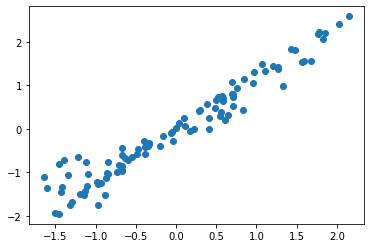

In [117]:
plt.scatter(Yt_scaled,predictions)

In [118]:
pred_df = pd.DataFrame(predictions,columns=['A','B'])
pred_df

,A,B
0,-0.962462,1.434968
1,-0.643767,-0.272948
2,-1.220003,1.054733
3,1.458973,0.306618
4,-1.745486,-0.103305
5,0.645221,0.991124
6,0.950592,-0.835883
7,-1.043372,0.527414
8,-0.950146,1.328151
9,-1.313201,-0.653580


In [119]:
Y_stress = pd.DataFrame(Y_scaled,columns=['A','B'])
Yt_stress = pd.DataFrame(Yt_scaled,columns=['A','B'])


In [120]:
from sklearn import metrics

In [121]:
print('MSE_for_trained_data',metrics.mean_squared_error(Y_scaled,predictions_2))

MSE_for_trained_data 0.04516367920928367


In [122]:
print('MAE:',metrics.mean_absolute_error(Yt_scaled,predictions))
print('MSE:',metrics.mean_squared_error(Yt_scaled,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Yt_scaled,predictions)))

MAE: 0.23022803105219364
MSE: 0.08120128170026422
RMSE: 0.28495838590970474


In [123]:
mse,bias,var = bias_variance_decomp(reg,X_scaled,Y_stress['B'],Xt_scaled,Yt_stress['B'],loss='mse', num_rounds=200, random_seed=1)
#mse,bias,var = bias_variance_decomp(reg,x_train,y_train,x_test,y_test,loss='mse', num_rounds=200, random_seed=1)
#mse, bias, var = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
#print('MSE: %.3f' % mse)
#print('Bias: %.3f' % bias)
#print('Variance: %.3f' % var)

ValueError: The bias_variance_decomp does not support pandas DataFrames yet. Please check the inputs to X_train, y_train, X_test, y_test. If e.g., X_train is a pandas DataFrame, try passing it as NumPy array via X_train=X_train.values.

In [124]:
x1_train = x_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [125]:
explained_variance_score(Yt_scaled,predictions)

0.9187987182997357

In [126]:
predictions


array([[-9.62461839e-01,  1.43496757e+00],
       [-6.43766691e-01, -2.72947512e-01],
       [-1.22000280e+00,  1.05473278e+00],
       [ 1.45897269e+00,  3.06618365e-01],
       [-1.74548585e+00, -1.03304829e-01],
       [ 6.45221343e-01,  9.91123613e-01],
       [ 9.50591914e-01, -8.35883102e-01],
       [-1.04337169e+00,  5.27414222e-01],
       [-9.50146105e-01,  1.32815135e+00],
       [-1.31320088e+00, -6.53580157e-01],
       [ 1.15666006e+00, -1.51188027e+00],
       [-9.88636326e-01, -1.11526966e+00],
       [-6.33949226e-02, -7.03369309e-01],
       [ 5.76215645e-01,  2.11804233e-01],
       [ 2.48458747e-01, -1.32546103e+00],
       [-1.25883608e+00, -2.68472132e-01],
       [ 2.41989713e+00, -1.74818037e+00],
       [-6.64343996e-01, -4.52364140e-01],
       [-1.01109900e+00,  7.45944483e-01],
       [ 1.30003630e+00, -7.13868507e-01],
       [-5.74201496e-01,  1.55711817e+00],
       [ 7.23972460e-01, -1.36115389e+00],
       [-1.25395335e+00,  7.98867404e-01],
       [ 7.

In [127]:
np.mean(cross_val_score(reg, x_poly, y, cv=5))

0.7414944074722281

In [129]:
from sklearn.metrics import r2_score
R_sqrd = r2_score(pred_df['A'],Yt_stress['A'])
R_sqrd

0.9527650014496988